## Import Packages/Library yang Digunakan

Pada bagian ini, dilakukan import semua packages/library yang digunakan dalam proyek ini

In [ ]:
import pandas as pd
from google.colab import files
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

### Menunggah kaggle.json
Fungsi `files.upload()` dari Google Colab untuk mengunggah file dataset dari komputer lokal ke lingkungan notebook. Fungsi ini memungkinkan digunakan untuk mengunggah kaggle.json yang ingin digunakan dalam ini.

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kornels","key":"b175815434db27754ec36fcad5ce0a80"}'}

Diperlukan beberapa langkah untuk mengonfigurasi akses ke API Kaggle dan mengunduh dataset yang dibutuhkan untuk proyek ini:

1. **Membuat Direktori untuk API Kaggle:**
   - Perintah `!mkdir ~/.kaggle` digunakan untuk membuat direktori `.kaggle` di lingkungan home pengguna. Direktori ini digunakan untuk menyimpan file kredensial API Kaggle.

2. **Memindahkan File `kaggle.json`:**
   - File `kaggle.json` yang berisi kredensial API dipindahkan ke direktori `.kaggle` menggunakan perintah `!mv kaggle.json ~/.kaggle/`. File ini diperlukan untuk mengautentikasi permintaan ke API Kaggle.

3. **Mengatur Izin Akses File:**
   - Perintah `!chmod 600 ~/.kaggle/kaggle.json` digunakan untuk mengubah izin file `kaggle.json` agar hanya pengguna yang dapat mengaksesnya. Ini meningkatkan keamanan kredensial API.

4. **Mengunduh Dataset dari Kaggle:**
   - Perintah `!kaggle datasets download nikhil7280/student-performance-multiple-linear-regression` digunakan untuk mengunduh dataset "Student Performance for Multiple Linear Regression" dari Kaggle. Dataset ini digunakan untuk tujuan analisis dan pembangunan model regresi linier.

Setelah menjalankan perintah-perintah ini, dataset akan diunduh dan tersedia dalam direktori kerja notebook colab untuk diproses lebih lanjut.

In [ ]:
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download nikhil7280/student-performance-multiple-linear-regression

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other


Perintah `!unzip` untuk mengekstrak file zip yang baru saja diunduh, yaitu file `student-performance-multiple-linear-regression.zip`.

`!unzip "student-performance-multiple-linear-regression.zip"`: Perintah ini akan mengekstrak isi dari file ZIP.

Setelah mengekstrak file, file dataset yang ada di dalamnya, yang berupa file CSV akan digunakan dalam analisis lebih lanjut.

In [ ]:
!unzip "student-performance-multiple-linear-regression.zip"

Archive:  student-performance-multiple-linear-regression.zip
replace Student_Performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Performance.csv  


Perintah ini menghapus file `student-performance-multiple-linear-regression.zip` yang ada di direktori `/content/` untuk menghemat ruang penyimpanan setelah file ZIP tidak lagi dibutuhkan.

Setelah perintah ini dijalankan, file ZIP yang telah diekstrak akan dihapus dari direktori kerja, sehingga hanya file dataset yang diperlukan yang tersisa untuk proses selanjutnya.

In [ ]:
!rm /content/student-performance-multiple-linear-regression.zip

Perintah ini membaca file CSV `Student_Performance.csv` dan memuatnya ke dalam sebuah DataFrame `df`. DataFrame ini akan digunakan untuk analisis lebih lanjut.

Setelah perintah ini dijalankan, dataset `Student_Performance.csv` akan dimuat ke dalam variabel `df`.

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Exploratory Data Analysis

### Deskripsi Variabel

Pada tahap ini, dilakukan eksplorasi dataset untuk mendapatkan gambaran umum tentang struktur data dan nilai-nilai yang terkandung di dalamnya.

1. `df.info()`: Memberikan informasi tentang tipe data dan jumlah nilai yang valid di setiap kolom.
2. `df.describe()`: Menyediakan statistik deskriptif untuk fitur numerik dalam dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Dataset ini terdiri dari beberapa fitur numerik dan kategorikal. Berdasarkan hasil `df.info()`, dapat dilihat bahwa dataset memiliki 10000 sampel, dan kolom-kolom dalam dataset memiliki tipe data yang sesuai (misalnya, numerik untuk skor, jam belajar, dll.). Tidak ada kolom yang memiliki tipe data yang salah.

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Dari hasil `df.describe()`, didapatkan gambaran tentang distribusi nilai dalam dataset.

### Missing Values

Kode ini memeriksa apakah ada nilai yang hilang dalam dataset menggunakan:
- `df.isnull().sum()`: Menampilkan jumlah nilai hilang untuk setiap kolom.

In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Hasil dari `df.isnull().sum()` menunjukkan bahwa tidak ada nilai yang hilang pada dataset ini. Hal ini sangat penting karena tidak perlu melakukan teknik pengisian atau imputation untuk menangani missing values. Dataset ini sudah bersih dari nilai yang hilang

### Duplicated Values

Kode ini memeriksa apakah ada duplikasi data dalam dataset dan menghapusnya jika ada.
- `df.duplicated().sum()`: Menampilkan jumlah duplikasi.
- `df.drop_duplicates()`: Menghapus duplikasi data.

In [ ]:
print(f"Number of duplicated: {df.duplicated().sum()}")
df = df.drop_duplicates()

Number of duplicated: 127


Dari hasil `df.duplicated().sum()`, diketahui bahwa terdapat beberapa duplikasi data dalam dataset. Namun, setelah dihapus menggunakan `df.drop_duplicates()`, tidak ada duplikasi yang akan mempengaruhi model yang dikembangkan. Menghapus duplikasi data penting untuk memastikan bahwa model tidak terlatih pada data yang redundan, yang bisa mengarah pada overfitting.

In [ ]:
print(f"Number of duplicated: {df.duplicated().sum()}")

Number of duplicated: 0


Hasil akhir df, tidak ada data duplicate

### Outliers

Untuk menganalisis adanya outlier pada data numerik, maka digunakan boxplot dengan seaborn. Beberapa fitur yang dianalisis meliputi:
- `Hours Studied`, `Previous Scores`, `Sleep Hours`, `Sample Question Papers Practiced`, dan `Performance Index`.

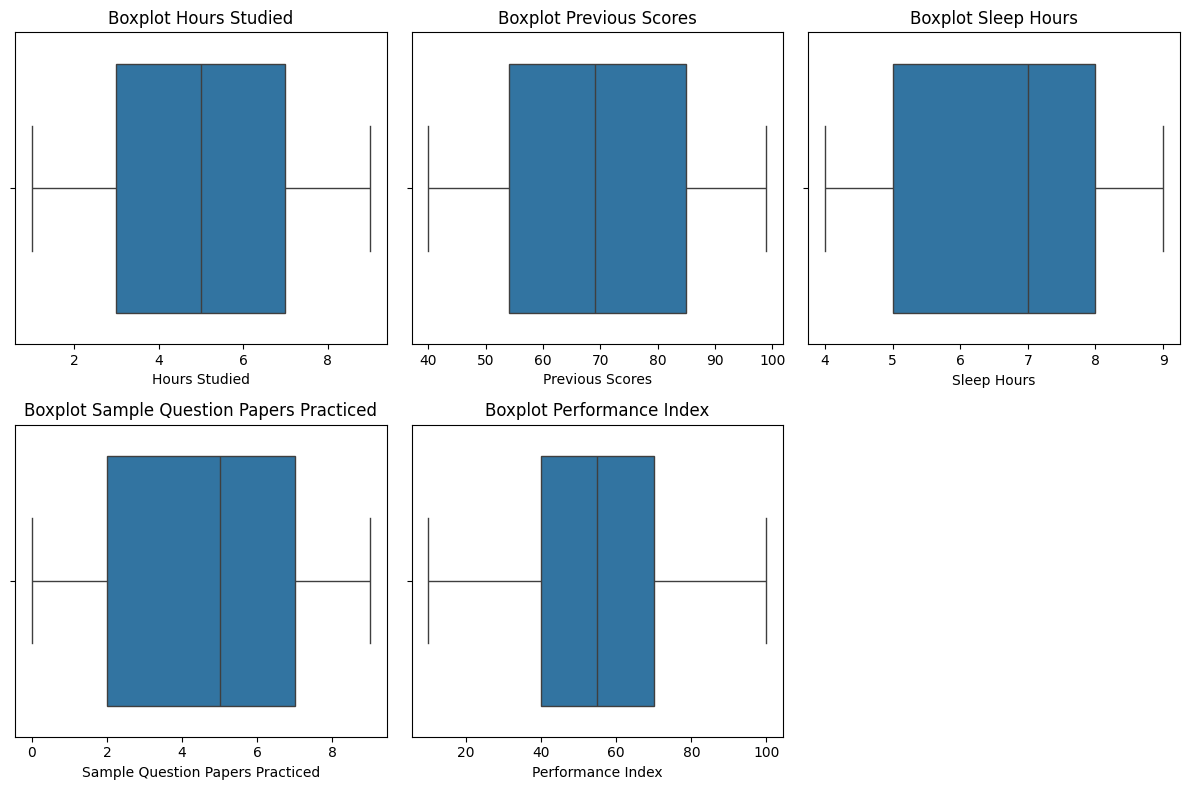

In [ ]:
numeric_feature = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced','Performance Index']

plt.figure(figsize=(12, 8))

for i, x in enumerate(numeric_feature, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(x=df[x])
  plt.title(f"Boxplot {x}")

plt.tight_layout()
plt.show()

Dalam visualisasi boxplot untuk fitur numerik, dapat dilihat tidak adanya outlier pada fitur-fitur tersebut.

### Multivariate Analysis

Dengan menggunakan `sns.pairplot()` dan `sns.heatmap()`, dapat dilihat hubungan antara fitur numerik dalam dataset. Salah satu temuan yang menarik adalah adanya korelasi positif yang cukup kuat antara "Previous Scores" dan "Performance Index" (skor kinerja), yang menunjukkan bahwa skor sebelumnya berpengaruh terhadap kinerja siswa.

- `sns.pairplot()`: Memvisualisasikan hubungan antar fitur dalam bentuk pairplot.
- `sns.heatmap()`: Menampilkan matriks korelasi antar fitur numerik dalam bentuk heatmap.

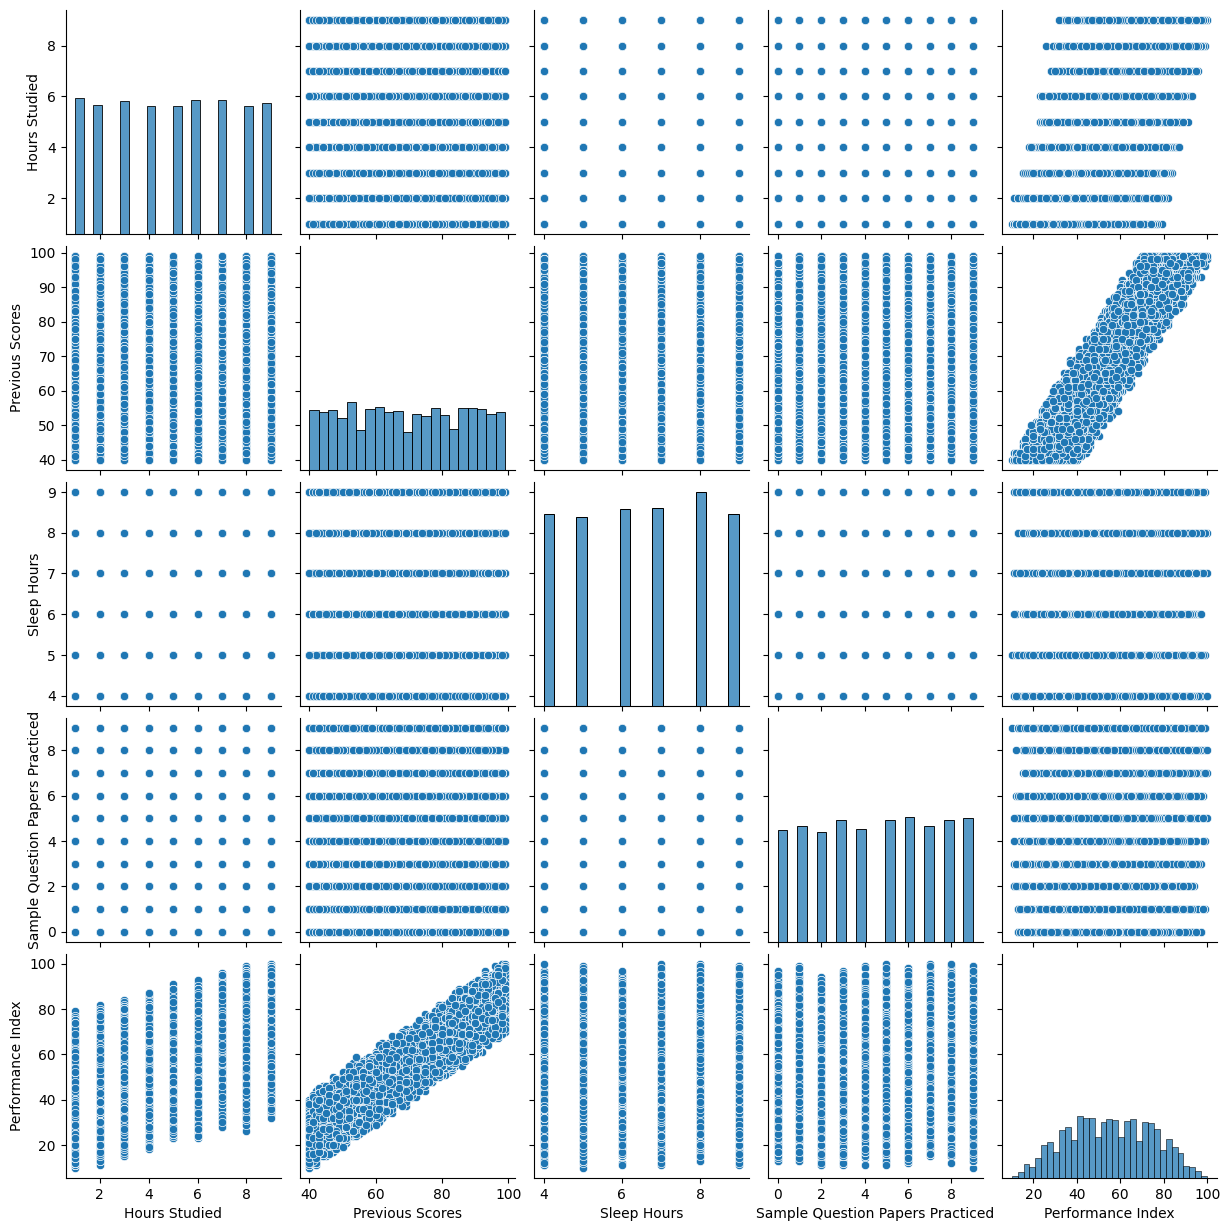

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

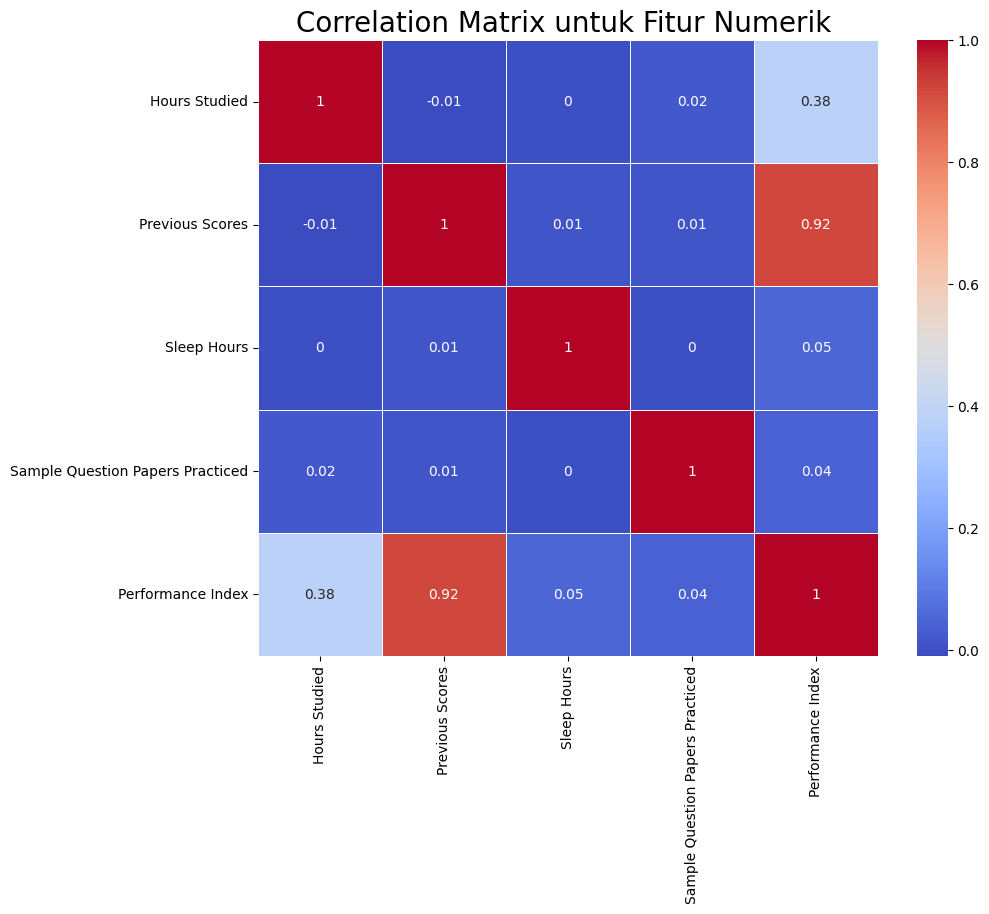

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_feature].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan analisis multivariat ini, dapat disimpulkan bahwa `Previous Scores` adalah faktor tertinggi yang mempengaruhi kinerja siswa.

## Data Preparation

### Label Encoder

`LabelEncoder` digunakan untuk mengubah kolom kategorikal "Extracurricular Activities" menjadi nilai numerik agar dapat digunakan dalam model.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()

df["Extracurricular Activities"] = encoder.fit_transform(df["Extracurricular Activities"])

<ipython-input-15-d2574a37665c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Extracurricular Activities"] = encoder.fit_transform(df["Extracurricular Activities"])


### Train Test Split

Data dibagi menjadi dua bagian: data pelatihan dan data pengujian menggunakan `train_test_split` dari `sklearn.model_selection`. Bagian data pelatihan akan digunakan untuk melatih model, dan bagian data pengujian untuk mengevaluasi kinerja model.

- `X`: Fitur yang digunakan untuk prediksi.
- `y`: Target variabel (Performance Index).
- Data dibagi dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Performance Index"], axis=1)
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 9873
Total of sample in train dataset: 7898
Total of sample in test dataset: 1975


## Standarisasi

`StandardScaler` digunakan untuk menstandarisasi fitur numerik (seperti Hours Studied, Previous Scores, dll.) di data pelatihan. Ini penting untuk algoritma seperti regresi linier dan KNN yang sensitif terhadap skala fitur.

Setelah standarisasi, data memiliki rata-rata 0 dan standar deviasi 1.

In [ ]:
features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]

scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])

In [ ]:
X_test.loc[:, features] = scaler.transform(X_test[features]).astype(float)

<ipython-input-24-e2069636ec62>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.38294675  0.77705585  0.39038831 ... -1.15628182  0.77705585
 -0.76961428]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, features] = scaler.transform(X_test[features]).astype(float)
<ipython-input-24-e2069636ec62>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.30806369  1.19473386  0.21213546 ...  1.71493302  1.42593349
 -0.82826285]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, features] = scaler.transform(X_test[features]).astype(float)
<ipython-input-24-e2069636ec62>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.90863447 -1.49715301 -0.32011593 ...  0.85692114 

In [ ]:
X_train.describe().round(4)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,7898.0000,7898.0000,7898.000,7898.0000,7898.0000
mean,-0.0000,-0.0000,0.497,0.0000,-0.0000
std,1.0001,1.0001,0.500,1.0001,1.0001
min,-1.5429,-1.6953,0.000,-1.4972,-1.6066
25%,-0.7696,-0.8861,0.000,-0.9086,-0.9077
50%,0.0037,-0.0191,0.000,0.2684,0.1405
75%,0.7771,0.9057,1.000,0.8569,0.8393
max,1.5504,1.7149,1.000,1.4454,1.5382


## Model Development

Terdapat tiga model regresi untuk memprediksi "Performance Index":
1. **Linear Regression**: Model regresi linier untuk prediksi berdasarkan hubungan linear antara fitur dan target.
2. **Random Forest**: Model Random Forest Regressor yang terdiri dari banyak pohon keputusan untuk meningkatkan akurasi prediksi.
3. **KNN (K-Nearest Neighbors)**: Model K-Nearest Neighbors untuk prediksi berdasarkan kedekatan dengan titik data terdekat.

Setiap model dilatih pada data pelatihan dan diukur menggunakan Mean Squared Error (MSE).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['Linear Regression', 'RandomForest', 'KNN'])

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred = lr.predict(X_train), y_true=y_train)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

## Evaluasi Model

Evaluasi terhadap model yang telah dikembangkan dengan menghitung MSE pada data pelatihan dan pengujian. Metrik ini memberikan gambaran seberapa baik model memprediksi target berdasarkan data yang ada.

Dan juga mencetak prediksi untuk 10 sampel pertama dari data pengujian untuk membandingkan nilai yang diprediksi dengan nilai asli (y_true).

Hasil evaluasi model disajikan dalam bentuk tabel dan grafik untuk membandingkan kinerja setiap model.

In [ ]:
model_dict = {'Linear Regression': lr, 'RandomForest': RF, 'KNN': knn}

for name, model in model_dict.items():
    models.loc["train_mse", name] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    models.loc['test_mse', name] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

In [ ]:
models

,Linear Regression,RandomForest,KNN
train_mse,4.144575,0.970478,7.52006
test_mse,4.305901,5.652286,8.344308


In [ ]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_Linear Regression,prediksi_RandomForest,prediksi_KNN
6099,47.0,46.5,46.3,48.6
106,76.0,80.3,81.7,78.5
9265,62.0,61.1,60.9,59.0
4707,23.0,22.7,22.6,27.2
2155,76.0,74.8,75.1,72.0
6594,83.0,84.2,83.5,84.8
9438,60.0,62.0,61.6,61.2
8905,51.0,50.3,51.1,50.6
2012,38.0,38.9,39.4,39.2
568,58.0,55.8,56.4,53.6


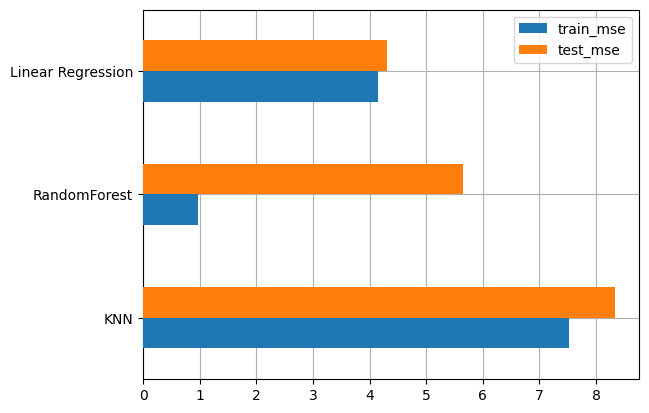

In [ ]:
fig, ax = plt.subplots()
# Transpose the DataFrame to have 'test_mse' and 'train_mse' as columns
models = models.T
models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Gambar diatas membandingkan nilai `train_mse` dan `test_mse` dari ketiga model yang diuji. Hal ini membantu untuk memvisualisasikan mana model yang paling baik dalam memprediksi "Performance Index", dalam hal ini yaitu Linear Regression.